In [3]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import polars as pl
from matplotlib_venn import venn2

pl.Config.set_fmt_str_lengths(100)


polars.config.Config

In [4]:
# データの読み込み
anime = pl.read_csv("../data/input/anime.csv", try_parse_dates=True)
train = pl.read_csv("../data/input/train.csv", try_parse_dates=True)
test = pl.read_csv("../data/input/test.csv", try_parse_dates=True)
display(anime.head())
display(train.head())
display(test.head())


anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64
"""000ba7f7e34e107e7544""","""Comedy, Sci-Fi, Seinen, Slice of Life, Space""","""宇宙兄弟""","""TV""","""99""","""Apr 1, 2012 to Mar 22, 2014""","""Aniplex, Dentsu, YTV, Trinity Sound""","""Sentai Filmworks""","""A-1 Pictures""","""Manga""","""24 min. per ep.""","""PG-13 - Teens 13 or older""",150428,16552,37234,13009,6948,76685
"""00427279d72064e7fb69""","""Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen""","""蟲師""","""TV""","""26""","""Oct 23, 2005 to Jun 19, 2006""","""Avex Entertainment, Marvelous, SKY Perfect Well Think, Delfi Sound""","""Funimation""","""Artland""","""Manga""","""25 min. per ep.""","""PG-13 - Teens 13 or older""",620736,55482,235371,42786,20017,267080
"""00444b67aaabdf740a68""","""Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen""","""蟲師 続章""","""TV""","""10""","""Apr 5, 2014 to Jun 21, 2014""","""Aniplex, Kodansha, Delfi Sound""","""Aniplex of America""","""Artland""","""Manga""","""24 min. per ep.""","""PG-13 - Teens 13 or older""",226522,12585,113559,6095,2606,91677
"""00839a3507ab168abe75""","""Comedy, Ecchi, Fantasy, School""","""星刻の竜騎士""","""TV""","""12""","""Apr 5, 2014 to Jun 21, 2014""","""Media Factory, AT-X, Sony Music Communications, Tsukuru no Mori""","""Funimation""","""C-Station""","""Light novel""","""24 min. per ep.""","""R+ - Mild Nudity""",170220,8723,118202,3753,8034,31508
"""0192331235e110fe4f76""","""Comedy, Harem, Romance, Sci-Fi, Shounen, Space""","""天地無用！""","""TV""","""26""","""Apr 2, 1995 to Sep 24, 1995""","""TV Tokyo, Pioneer LDC""","""Funimation, Geneon Entertainment USA""","""AIC""","""Original""","""23 min. per ep.""","""PG-13 - Teens 13 or older""",62599,2565,39890,2093,1986,16065


user_id,anime_id,score
str,str,i64
"""0008e10fb39e55447333""","""0669cc0219d468761195""",2
"""0008e10fb39e55447333""","""111adb8835b8a1a2cf54""",10
"""0008e10fb39e55447333""","""1fc8683c393432a2f9c7""",1
"""0008e10fb39e55447333""","""2290175205d55e81b197""",8
"""0008e10fb39e55447333""","""28f173b60331d5cabb0d""",9


user_id,anime_id
str,str
"""0008e10fb39e55447333""","""04068820a73e52dc3b32"""
"""0008e10fb39e55447333""","""04a3d0b122b24965e909"""
"""0008e10fb39e55447333""","""1447fe1f10b59912d6a8"""
"""0008e10fb39e55447333""","""2622632598c68682afd5"""
"""0008e10fb39e55447333""","""2701850c7216516fec46"""


In [5]:
print(f"df_anime Memory usage of dataframe became {round(anime.estimated_size('mb'), 4)} MB.")
print(f"df_train Memory usage of dataframe became {round(train.estimated_size('mb'), 4)} MB.")
print(f"df_test Memory usage of dataframe became {round(test.estimated_size('mb'), 4)} MB.")


df_anime Memory usage of dataframe became 0.5448 MB.
df_train Memory usage of dataframe became 6.2439 MB.
df_test Memory usage of dataframe became 4.489 MB.


In [6]:
anime = anime.select(pl.all().shrink_dtype())
train = train.select(pl.all().shrink_dtype())
test = test.select(pl.all().shrink_dtype())
print(f"anime Memory usage of dataframe became {round(anime.estimated_size('mb'), 4)} MB.")
print(f"train Memory usage of dataframe became {round(train.estimated_size('mb'), 4)} MB.")
print(f"test Memory usage of dataframe became {round(test.estimated_size('mb'), 4)} MB.")


anime Memory usage of dataframe became 0.499 MB.
train Memory usage of dataframe became 5.3334 MB.
test Memory usage of dataframe became 4.489 MB.


# train, testでuser_idがどの程度重複するか

In [7]:
train_user_id_set = set(list(train["user_id"].unique()))
test_user_id_set = set(list(test["user_id"].unique()))

print(f"train_user_id_set: {len(train_user_id_set)}")
print(f"test_user_id_set: {len(test_user_id_set)}")


train_user_id_set: 1794
test_user_id_set: 1984


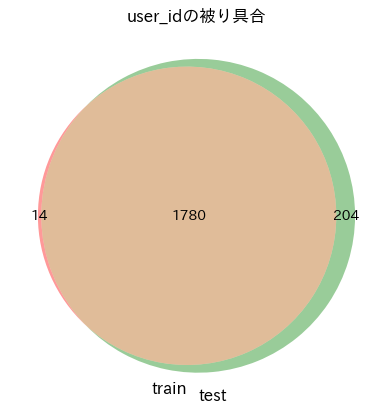

In [8]:
plt.title("user_idの被り具合")
venn2([train_user_id_set, test_user_id_set], ("train", "test"));


In [21]:
only_test_contain_user_id = test_user_id_set.difference(train_user_id_set)


In [22]:
test_only_test_contain_user_id = test.filter(pl.col("user_id").is_in(only_test_contain_user_id))

test_only_test_contain_user_id


user_id,anime_id
str,str
"""00eb399c958546986c29""","""01e4c56439ca58e9c71a"""
"""00eb399c958546986c29""","""0309947ce1d2cab4fb69"""
"""00eb399c958546986c29""","""030a3e39232b5fc784fc"""
"""00eb399c958546986c29""","""036f9083805619fc5b71"""
"""00eb399c958546986c29""","""041995f3f394ba00c88c"""
…,…
"""ffe85a36cd20500faa58""","""f508b02efeac8ecb8cc0"""
"""ffe85a36cd20500faa58""","""f5b8ecea3beea4b82d79"""
"""ffe85a36cd20500faa58""","""f6c208226b6b69948053"""


In [27]:
res = test_only_test_contain_user_id.height / test.height
print(f"testにあるがtrainにないuser_idの割合: {res * 100:.2f}%")


testにあるがtrainにないuser_idの割合: 22.74%


# train, testでanime_idがどの程度重複しているか

In [28]:
train_anime_id_set = set(list(train["anime_id"].unique()))
test_anime_id_set = set(list(test["anime_id"].unique()))


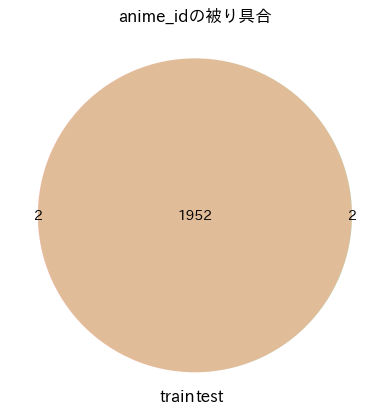

In [29]:
plt.title("anime_idの被り具合")
venn2([train_anime_id_set, test_anime_id_set], ("train", "test"));


In [30]:
only_train_contain_anime_id = train_anime_id_set.difference(test_anime_id_set)
only_test_contain_anime_id = test_anime_id_set.difference(train_anime_id_set)


In [31]:
anime.filter(pl.col("anime_id").is_in(only_train_contain_anime_id))


anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i32,i32,i32,i32,i32,i32
"""1e9b3a43745594039e42""","""Slice of Life, Comedy, Romance""","""ヲタクに恋は難しい OAD""","""OVA""","""2""","""Mar 29, 2019 to Feb 26, 2021""","""Aniplex, Half H.P Studio, Fujipacific Music""","""Unknown""","""A-1 Pictures, Lapin Track""","""Web manga""","""22 min. per ep.""","""PG-13 - Teens 13 or older""",90626,46279,327,10053,857,33110
"""867934bc2a611a8423da""","""Sci-Fi, Mystery, Psychological, Thriller, Shounen""","""約束のネバーランド""","""TV""","""11""","""Jan 8, 2021 to ?""","""Aniplex, Shueisha""","""Aniplex of America""","""CloverWorks""","""Manga""","""22 min. per ep.""","""R - 17+ (violence & profanity)""",482725,260775,60,6458,6966,208466


In [32]:
anime.filter(pl.col("anime_id").is_in(only_test_contain_anime_id))


anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i32,i32,i32,i32,i32,i32
"""21f8d20251a4f9d150c5""","""Action, Seinen""","""はたらく細胞BLACK""","""TV""","""13""","""Jan 10, 2021 to ?""","""Aniplex, Kodansha, Studio Mausu, Tokyo MX, NetEase""","""Aniplex of America""","""LIDENFILMS""","""Manga""","""23 min. per ep.""","""PG-13 - Teens 13 or older""",123446,56958,16,2262,1843,62367
"""d7cee297224130410c3b""","""Action, Adventure, Comedy, Super Power, Drama, Fantasy, Shounen""","""ONE PIECE""","""TV""","""Unknown""","""Oct 20, 1999 to ?""","""Fuji TV, TAP, Shueisha""","""Funimation, 4Kids Entertainment""","""Toei Animation""","""Manga""","""24 min.""","""PG-13 - Teens 13 or older""",1352724,887333,33,187919,136245,141194


In [33]:
anime.filter(pl.col("japanese_name").str.contains("ONE PIECE"))


anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i32,i32,i32,i32,i32,i32
"""a929e31a2bba9980dd82""","""Action, Adventure, Comedy, Drama, Fantasy, Shounen""","""ONE PIECE FILM GOLD""","""Movie""","""1""","""Jul 23, 2016""","""Unknown""","""Funimation""","""Toei Animation""","""Manga""","""2 hr.""","""PG-13 - Teens 13 or older""",121306,2388,100649,550,372,17347
"""ab0d17de9ade9bc13c64""","""Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power""","""劇場版『ONE PIECE STAMPEDE』（スタンピード）""","""Movie""","""1""","""Aug 9, 2019""","""Unknown""","""Unknown""","""Toei Animation""","""Manga""","""1 hr. 41 min.""","""PG-13 - Teens 13 or older""",77375,1467,57450,373,206,17879
"""d7cee297224130410c3b""","""Action, Adventure, Comedy, Super Power, Drama, Fantasy, Shounen""","""ONE PIECE""","""TV""","""Unknown""","""Oct 20, 1999 to ?""","""Fuji TV, TAP, Shueisha""","""Funimation, 4Kids Entertainment""","""Toei Animation""","""Manga""","""24 min.""","""PG-13 - Teens 13 or older""",1352724,887333,33,187919,136245,141194
"""eb25d8bf9c986ad62c41""","""Action, Adventure, Comedy, Super Power, Fantasy, Shounen""","""ONE PIECE""","""Movie""","""1""","""Mar 4, 2000""","""Unknown""","""Unknown""","""Toei Animation""","""Manga""","""50 min.""","""PG-13 - Teens 13 or older""",82437,1081,72673,408,357,7918


In [37]:
test_only_test_contain_anime_id = test.filter(pl.col("anime_id").is_in(only_test_contain_anime_id))
test_only_test_contain_anime_id


user_id,anime_id
str,str
"""332a8a7544b04e35b059""","""d7cee297224130410c3b"""
"""f6beb17befcf1afc0e0d""","""21f8d20251a4f9d150c5"""


In [36]:
res = test_only_test_contain_anime_id.height / test.height
print(f"testにあるがtrainにないanime_idの割合: {res * 100:.3f}%")


testにあるがtrainにないanime_idの割合: 0.002%


# Testの中に、user_id, anime_idの両方がtrainに存在しないものはあるか

In [38]:
test.filter(pl.col("user_id").is_in(only_test_contain_user_id), pl.col("anime_id").is_in(only_test_contain_anime_id))


user_id,anime_id
str,str
"""332a8a7544b04e35b059""","""d7cee297224130410c3b"""
